#Introduction

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. 


The first World Happiness Report has been published in 2012. That report was about the available global data on national happiness and reviewed related evidence from the emerging science of happiness, showing that the quality of people’s lives can be coherently, reliably, and validly assessed by a variety of subjective well-being measures, collectively referred to then and in subsequent reports as “happiness.” 

From then, each report includes updated evaluations to go deeper into the science of well-being, and on happiness. 

#Goal of the project

This notebook is about happiness in the world. The aim of this project is
to identify 

*   the regions/countries with the highest hapiness score
*   the features that have an impact on the hapiness score 

and to predict the hapiness score for 2018 based on a regression model.

# I. Cleaning Data

In [1]:
# import dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.gridspec as gridspec
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go

In [0]:
# import dataframes
df_WHR = pd.read_excel("https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls")
df_TauxChomage = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/tauxchomage.csv")
df_TauxPauvrete = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/taux_pauvrete.csv")
df_TauxMortaliteInfantile = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/taux_mortalite_infantile.csv")
df_TauxSuicide = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/tauxsuicide.csv")


In [3]:
df_WHR

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,2.776363,0.743257,NaN,0.432,0.596690,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1702,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,0.224051,0.682647,-0.988153,-1.350867,2.656848,0.730244,NaN,0.432,0.581484,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


In [4]:
df_WHR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 26 columns):
Country name                                                1704 non-null object
Year                                                        1704 non-null int64
Life Ladder                                                 1704 non-null float64
Log GDP per capita                                          1676 non-null float64
Social support                                              1691 non-null float64
Healthy life expectancy at birth                            1676 non-null float64
Freedom to make life choices                                1675 non-null float64
Generosity                                                  1622 non-null float64
Perceptions of corruption                                   1608 non-null float64
Positive affect                                             1685 non-null float64
Negative affect                                             1691 non-null fl

In [5]:
# Droping the features according the correlation
to_drop = [
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014',]

df_WHR.drop(to_drop, inplace=True, axis=1)
df_WHR

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,2.776363,0.743257
1702,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,0.224051,0.682647,-0.988153,-1.350867,2.656848,0.730244


In [6]:
# Drop null data for world hapiness score dataset
df_WHR.dropna(inplace=True)
# Check if there are null for data for world hapiness score dataset
df_WHR.isnull().sum()

Country name                                         0
Year                                                 0
Life Ladder                                          0
Log GDP per capita                                   0
Social support                                       0
Healthy life expectancy at birth                     0
Freedom to make life choices                         0
Generosity                                           0
Perceptions of corruption                            0
Positive affect                                      0
Negative affect                                      0
Confidence in national government                    0
Democratic Quality                                   0
Delivery Quality                                     0
Standard deviation of ladder by country-year         0
Standard deviation/Mean of ladder by country-year    0
dtype: int64

In [7]:
df_WHR.shape

(1317, 16)

In [0]:
#Changing the colums name
df_WHR.columns = ['Country', 'Year','Happiness score','Economy(GDP per Capita)','Social support','Health(Life expectancy at birth)','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect','Confidence in national government','Democratic Quality','Delivery Quality','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year']

In [9]:
#Check for the unique values of country names
unique = df_WHR['Country'].unique()
unique

array(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana',
       'Haiti', 'Honduras', 'Hong Kong S.A.R. of China', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', '

In [0]:
#map of region according to countries
region={
'Afghanistan' : 'Asia-Pacific',
'Albania' : 'Eastern Europe',
'Algeria' : 'Africa',
'Angola' : 'Africa',
'Argentina' : 'Latin America',
'Armenia' : 'Asia-Pacific',
'Australia' : 'Asia-Pacific',
'Austria' : 'Western Europe',
'Azerbaijan' : 'Asia-Pacific',
'Bahrain' : 'Asia-Pacific',
'Bangladesh' : 'Asia-Pacific', 
'Belarus' : 'Eastern Europe', 
'Belgium' : 'Western Europe', 
'Belize' : 'Latin America', 
'Benin' : 'Africa', 
'Bhutan' : 'Asia-Pacific',
'Bolivia' : 'Latin America', 
'Bosnia and Herzegovina' : 'Eastern Europe', 
'Botswana' : 'Africa', 
'Brazil' : 'Latin America',
'Bulgaria' : 'Eastern Europe', 
'Burkina Faso' : 'Africa', 
'Burundi' : 'Africa', 
'Cambodia' : 'Asia-Pacific', 
'Cameroon' : 'Africa',
'Canada' : 'North America', 
'Central African Republic' : 'Africa', 
'Chad': 'Africa', 
'Chile' : 'Latin America', 
'China' : 'Asia-Pacific',
'Colombia' : 'Latin America', 
'Comoros' : 'Africa', 
'Congo (Brazzaville)' : 'Africa', 
'Congo (Kinshasa)' : 'Africa',
'Costa Rica' : 'Latin America', 
'Croatia' : 'Eastern Europe', 
'Cuba' : 'Latin America', 
'Cyprus' : 'Eastern Europe', 
'Czech Republic' : 'Western Europe',
'Denmark' : 'Western Europe', 
'Djibouti' : 'Africa', 
'Dominican Republic' : 'Latin America', 
'Ecuador' : 'Latin America', 
'Egypt' : 'Africa',
'El Salvador' : 'Latin America', 
'Estonia' : 'Eastern Europe', 
'Ethiopia' : 'Africa', 
'Finland' : 'Western Europe', 
'France' : 'Western Europe', 
'Gabon' : 'Africa',
'Gambia' : 'Africa', 
'Georgia' : 'Asia-Pacific', 
'Germany' : 'Western Europe', 
'Ghana' : 'Africa', 
'Greece' : 'Eastern Europe', 
'Guatemala' : 'Latin America',
'Guinea' : 'Africa', 
'Guyana' : 'Latin America', 
'Haiti' : 'Latin America', 
'Honduras' : 'Latin America',
'Hong Kong S.A.R. of China' : 'Asia-Pacific', 
'Hungary' : 'Eastern Europe', 
'Iceland' : 'Western Europe', 
'India' : 'Asia-Pacific',
'Indonesia' : 'Asia-Pacific', 
'Iran' : 'Asia-Pacific', 
'Iraq' : 'Asia-Pacific', 
'Ireland' : 'Western Europe', 
'Israel' : 'Asia-Pacific', 
'Italy' : 'Western Europe',
'Ivory Coast' : 'Africa', 
'Jamaica' : 'Africa', 
'Japan' : 'Asia-Pacific', 
'Jordan' : 'Asia-Pacific', 
'Kazakhstan' : 'Asia-Pacific', 
'Kenya' : 'Africa',
'Kosovo' : 'Eastern Europe', 
'Kuwait' : 'Asia-Pacific', 
'Kyrgyzstan' : 'Asia-Pacific', 
'Laos' : 'Asia-Pacific', 
'Latvia' : 'Eastern Europe', 
'Lebanon' : 'Asia-Pacific',
'Lesotho' : 'Africa', 
'Liberia' : 'Africa', 
'Libya' : 'Africa', 
'Lithuania' : 'Eastern Europe', 
'Luxembourg' : 'Western Europe',
'Macedonia' : 'Eastern Europe', 
'Madagascar' : 'Africa', 
'Malawi' : 'Africa', 
'Malaysia' : 'Asia-Pacific', 
'Mali' : 'Africa', 
'Malta' : 'Western Europe',
'Mauritania' : 'Africa', 
'Mauritius' : 'Africa', 
'Mexico' : 'Latin America', 
'Moldova' : 'Eastern Europe', 
'Mongolia' : 'Asia-Pacific',
'Montenegro' : 'Eastern Europe', 
'Morocco' : 'Africa', 
'Mozambique' : 'Africa', 
'Myanmar' : 'Asia-Pacific', 
'Namibia' : 'Africa',
'Nepal' : 'Asia-Pacific', 
'Netherlands' : 'Western Europe', 
'New Zealand' : 'Asia-Pacific', 
'Nicaragua' : 'Latin America', 
'Niger' : 'Africa',
'Nigeria' : 'Africa', 
'North Cyprus' : 'Eastern Europe', 
'Norway' : 'Western Europe', 
'Oman' : 'Asia-Pacific', 
'Pakistan' : 'Asia-Pacific',
'Palestinian Territories': 'Asia-Pacific', 
'Panama' : 'Latin America', 
'Paraguay' : 'Latin America', 
'Peru' : 'Latin America',
'Philippines' : 'Asia-Pacific', 
'Poland' : 'Eastern Europe', 
'Portugal' : 'Western Europe', 
'Qatar' : 'Asia-Pacific', 
'Romania' : 'Eastern Europe',
'Russia' : 'Eastern Europe',
'Rwanda' : 'Africa', 
'Saudi Arabia' : 'Asia-Pacific', 
'Senegal' : 'Africa', 
'Serbia' : 'Eastern Europe', 
'Sierra Leone' : 'Africa',
'Singapore' : 'Asia-Pacific', 
'Slovakia' : 'Eastern Europe', 
'Slovenia' : 'Eastern Europe', 
'Somalia' : 'Africa',
'Somaliland region' : 'Africa', 
'South Africa' : 'Africa', 
'South Korea' : 'Asia-Pacific', 
'South Sudan' : 'Africa',
'Spain' : 'Western Europe', 
'Sri Lanka' : 'Asia-Pacific', 
'Sudan' : 'Africa', 
'Suriname' : 'Latin America', 
'Swaziland' : 'Africa', 
'Sweden' : 'Western Europe',
'Switzerland' : 'Western Europe', 
'Syria' : 'Asia-Pacific', 
'Taiwan Province of China' : 'Asia-Pacific', 
'Tajikistan' : 'Asia-Pacific',
'Tanzania' : 'Africa', 
'Thailand' : 'Asia-Pacific', 
'Togo' : 'Africa', 
'Trinidad and Tobago' : 'Latin America', 
'Tunisia' : 'Africa',
'Turkey' : 'Asia-Pacific', 
'Turkmenistan' : 'Asia-Pacific', 
'Uganda' : 'Africa', 
'Ukraine' : 'Eastern Europe',
'United Arab Emirates' : 'Asia-Pacific', 
'United Kingdom' : 'Western Europe', 
'United States' : 'North America',
'Uruguay' : 'Latin America', 
'Uzbekistan' : 'Asia-Pacific', 
'Venezuela' : 'Latin America', 
'Vietnam' : 'Asia-Pacific', 
'Yemen' : 'Asia-Pacific', 
'Zambia' : 'Africa',
'Zimbabwe' : 'Africa'
}

In [11]:
#Add Region column to the main dataframe
df_WHR['Region'] = df_WHR['Country'].map(region)
df_WHR

,Country,Year,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,Asia-Pacific
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,Asia-Pacific
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,Asia-Pacific
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,Asia-Pacific
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,Asia-Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Zimbabwe,2013,4.690188,7.565154,0.799274,50.959999,0.575884,-0.079458,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,Africa
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,Africa
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,Africa
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,2.776363,0.743257,Africa


###Unemployement rate 

In [12]:
# The value represents the percentage of the active poplulation
df_TauxChomage

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,UNEMP,TOT,PC_LF,A,2006,4.785240,NaN
1,AUS,UNEMP,TOT,PC_LF,A,2007,4.379151,NaN
2,AUS,UNEMP,TOT,PC_LF,A,2008,4.234330,NaN
3,AUS,UNEMP,TOT,PC_LF,A,2009,5.560385,NaN
4,AUS,UNEMP,TOT,PC_LF,A,2010,5.213340,NaN
...,...,...,...,...,...,...,...,...
555,LTU,UNEMP,TOT,PC_LF,A,2014,10.699690,NaN
556,LTU,UNEMP,TOT,PC_LF,A,2015,9.119895,NaN
557,LTU,UNEMP,TOT,PC_LF,A,2016,7.860914,NaN
558,LTU,UNEMP,TOT,PC_LF,A,2017,7.071820,NaN


In [13]:
#here we check the unique country codes in the dataframe
unique_country_code1 = df_TauxChomage.LOCATION.unique()
unique_country_code1

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'EST', 'IDN', 'ISR', 'RUS',
       'SVN', 'ZAF', 'EU28', 'OECD', 'EA19', 'COL', 'LVA', 'LTU'],
      dtype=object)

In [0]:
#we create a map of the country codes and assign the country name
country1={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'JPN':'Japan',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania'
}

In [0]:
df_TauxChomage['Country'] = df_TauxChomage['LOCATION'].map(country1)

In [16]:
#keep only the colums we want to work with
to_drop = ['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes']
df_TauxChomage.drop(to_drop, inplace=True, axis=1)
df_TauxChomage

,TIME,Value,Country
0,2006,4.785240,Australia
1,2007,4.379151,Australia
2,2008,4.234330,Australia
3,2009,5.560385,Australia
4,2010,5.213340,Australia
...,...,...,...
555,2014,10.699690,Lithuania
556,2015,9.119895,Lithuania
557,2016,7.860914,Lithuania
558,2017,7.071820,Lithuania


In [18]:
df_TauxChomage.columns = ['Year','Value Unemployement rate','Country']
df_TauxChomage

,Year,Value Unemployement rate,Country
0,2006,4.785240,Australia
1,2007,4.379151,Australia
2,2008,4.234330,Australia
3,2009,5.560385,Australia
4,2010,5.213340,Australia
...,...,...,...
555,2014,10.699690,Lithuania
556,2015,9.119895,Lithuania
557,2016,7.860914,Lithuania
558,2017,7.071820,Lithuania


In [19]:
# Drop null data for Unemployement rate  dataset
df_TauxChomage.dropna(inplace=True)
# Check if there are null for data for Unemployement rate  dataset
df_TauxChomage.isnull().sum()

Year                        0
Value Unemployement rate    0
Country                     0
dtype: int64

###Poverty rate 

In [20]:
# The value represents The poverty rate corresponds to the proportion of people
#  whose income is below the poverty line, i.e. half of the median income of the total population
df_TauxPauvrete

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POVERTY,TOT,RT,A,2012,0.140,NaN
1,AUS,POVERTY,TOT,RT,A,2014,0.128,NaN
2,AUS,POVERTY,TOT,RT,A,2016,0.121,NaN
3,AUT,POVERTY,TOT,RT,A,2007,0.097,NaN
4,AUT,POVERTY,TOT,RT,A,2008,0.092,NaN
...,...,...,...,...,...,...,...,...
303,CRI,POVERTY,TOT,RT,A,2014,0.215,NaN
304,CRI,POVERTY,TOT,RT,A,2015,0.206,NaN
305,CRI,POVERTY,TOT,RT,A,2016,0.209,NaN
306,CRI,POVERTY,TOT,RT,A,2017,0.204,NaN


In [21]:
unique_country_code2 = df_TauxPauvrete.LOCATION.unique()
unique_country_code2

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'KOR', 'LUX', 'MEX', 'NLD',
       'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR',
       'GBR', 'USA', 'EST', 'ISR', 'SVN', 'JPN', 'CHL', 'LVA', 'LTU',
       'BRA', 'CHN', 'IND', 'RUS', 'ZAF', 'CRI'], dtype=object)

In [0]:
country2={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'JPN':'Japan',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania',
'CRI':'Costa rica',
'IND':'India',
'CHN':'China'
}

In [23]:
df_TauxPauvrete['COUNTRY'] = df_TauxPauvrete['LOCATION'].map(country2)
df_TauxPauvrete

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,COUNTRY
0,AUS,POVERTY,TOT,RT,A,2012,0.140,NaN,Australia
1,AUS,POVERTY,TOT,RT,A,2014,0.128,NaN,Australia
2,AUS,POVERTY,TOT,RT,A,2016,0.121,NaN,Australia
3,AUT,POVERTY,TOT,RT,A,2007,0.097,NaN,Austria
4,AUT,POVERTY,TOT,RT,A,2008,0.092,NaN,Austria
...,...,...,...,...,...,...,...,...,...
303,CRI,POVERTY,TOT,RT,A,2014,0.215,NaN,Costa rica
304,CRI,POVERTY,TOT,RT,A,2015,0.206,NaN,Costa rica
305,CRI,POVERTY,TOT,RT,A,2016,0.209,NaN,Costa rica
306,CRI,POVERTY,TOT,RT,A,2017,0.204,NaN,Costa rica


In [24]:
to_drop = ['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes','LOCATION']
df_TauxPauvrete.drop(to_drop, inplace=True, axis=1)
df_TauxPauvrete

,TIME,Value,COUNTRY
0,2012,0.140,Australia
1,2014,0.128,Australia
2,2016,0.121,Australia
3,2007,0.097,Austria
4,2008,0.092,Austria
...,...,...,...
303,2014,0.215,Costa rica
304,2015,0.206,Costa rica
305,2016,0.209,Costa rica
306,2017,0.204,Costa rica


In [25]:
df_TauxPauvrete.columns = ['Year','Value Poverty rate','Country']
df_TauxPauvrete

,Year,Value Poverty rate,Country
0,2012,0.140,Australia
1,2014,0.128,Australia
2,2016,0.121,Australia
3,2007,0.097,Austria
4,2008,0.092,Austria
...,...,...,...
303,2014,0.215,Costa rica
304,2015,0.206,Costa rica
305,2016,0.209,Costa rica
306,2017,0.204,Costa rica


In [26]:
# Drop null data for Poverty rate  dataset
df_TauxPauvrete.dropna(inplace=True)
# Check if there are null for data for Poverty rate dataset
df_TauxPauvrete.isnull().sum()

Year                  0
Value Poverty rate    0
Country               0
dtype: int64

###Child mortality rate

In [47]:
# The value represents the number of deaths per 1000 live births
df_TauxMortaliteInfantile

,Year,Value Child mortality rate,Country
0,2006,4.7,Australia
1,2007,4.1,Australia
2,2008,4.1,Australia
3,2009,4.2,Australia
4,2010,4.1,Australia
...,...,...,...
520,2013,8.7,Costa rica
521,2014,8.1,Costa rica
522,2015,7.7,Costa rica
523,2016,7.9,Costa rica


In [28]:
unique_country_code3 = df_TauxMortaliteInfantile.LOCATION.unique()
unique_country_code3

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'IDN',
       'ISR', 'RUS', 'SVN', 'ZAF', 'COL', 'LVA', 'LTU', 'CRI'],
      dtype=object)

In [0]:
country3={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'JPN':'Japan',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania',
'CRI':'Costa rica',
'IND':'India',
'CHN':'China'
}

In [30]:
df_TauxMortaliteInfantile['COUNTRY'] = df_TauxMortaliteInfantile['LOCATION'].map(country3)
df_TauxMortaliteInfantile

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,COUNTRY
0,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2006,4.7,NaN,Australia
1,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2007,4.1,NaN,Australia
2,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2008,4.1,NaN,Australia
3,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2009,4.2,NaN,Australia
4,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2010,4.1,NaN,Australia
...,...,...,...,...,...,...,...,...,...
520,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2013,8.7,NaN,Costa rica
521,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2014,8.1,NaN,Costa rica
522,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2015,7.7,NaN,Costa rica
523,CRI,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2016,7.9,NaN,Costa rica


In [31]:
to_drop = ['LOCATION','INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes']
df_TauxMortaliteInfantile.drop(to_drop, inplace=True, axis=1)
df_TauxMortaliteInfantile

,TIME,Value,COUNTRY
0,2006,4.7,Australia
1,2007,4.1,Australia
2,2008,4.1,Australia
3,2009,4.2,Australia
4,2010,4.1,Australia
...,...,...,...
520,2013,8.7,Costa rica
521,2014,8.1,Costa rica
522,2015,7.7,Costa rica
523,2016,7.9,Costa rica


In [34]:
df_TauxMortaliteInfantile.columns = ['Year','Value Child mortality rate','Country']
df_TauxMortaliteInfantile

,Year,Value Child mortality rate,Country
0,2006,4.7,Australia
1,2007,4.1,Australia
2,2008,4.1,Australia
3,2009,4.2,Australia
4,2010,4.1,Australia
...,...,...,...
520,2013,8.7,Costa rica
521,2014,8.1,Costa rica
522,2015,7.7,Costa rica
523,2016,7.9,Costa rica


In [35]:
# Drop null data for Child mortality rate  dataset
df_TauxMortaliteInfantile.dropna(inplace=True)
# Check if there are null for Child mortality rate dataset
df_TauxMortaliteInfantile.isnull().sum()

Year                          0
Value Child mortality rate    0
Country                       0
dtype: int64

###Suicide rate

In [39]:
#The value represents the number of deaths per 100,000
df_TauxSuicide

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,2006,10.5,NaN
1,AUS,SUICIDE,TOT,100000PER,A,2007,10.6,NaN
2,AUS,SUICIDE,TOT,100000PER,A,2008,10.9,NaN
3,AUS,SUICIDE,TOT,100000PER,A,2009,10.7,NaN
4,AUS,SUICIDE,TOT,100000PER,A,2010,10.9,NaN
...,...,...,...,...,...,...,...,...
426,CRI,SUICIDE,TOT,100000PER,A,2010,7.1,NaN
427,CRI,SUICIDE,TOT,100000PER,A,2011,7.1,NaN
428,CRI,SUICIDE,TOT,100000PER,A,2012,6.7,NaN
429,CRI,SUICIDE,TOT,100000PER,A,2013,7.0,NaN


In [40]:
unique_country_code4 = df_TauxSuicide.LOCATION.unique()
unique_country_code4

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'GBR', 'USA', 'BRA', 'CHL', 'EST', 'ISR', 'RUS', 'SVN', 'ZAF',
       'TUR', 'COL', 'LVA', 'LTU', 'CRI'], dtype=object)

In [0]:
country4={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'JPN':'Japan',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania',
'CRI':'Costa rica',
'IND':'India',
'CHN':'China'
}

In [42]:
df_TauxSuicide['COUNTRY'] = df_TauxSuicide['LOCATION'].map(country4)
df_TauxSuicide

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,COUNTRY
0,AUS,SUICIDE,TOT,100000PER,A,2006,10.5,NaN,Australia
1,AUS,SUICIDE,TOT,100000PER,A,2007,10.6,NaN,Australia
2,AUS,SUICIDE,TOT,100000PER,A,2008,10.9,NaN,Australia
3,AUS,SUICIDE,TOT,100000PER,A,2009,10.7,NaN,Australia
4,AUS,SUICIDE,TOT,100000PER,A,2010,10.9,NaN,Australia
...,...,...,...,...,...,...,...,...,...
426,CRI,SUICIDE,TOT,100000PER,A,2010,7.1,NaN,Costa rica
427,CRI,SUICIDE,TOT,100000PER,A,2011,7.1,NaN,Costa rica
428,CRI,SUICIDE,TOT,100000PER,A,2012,6.7,NaN,Costa rica
429,CRI,SUICIDE,TOT,100000PER,A,2013,7.0,NaN,Costa rica


In [43]:
to_drop = ['LOCATION','INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes']
df_TauxSuicide.drop(to_drop, inplace=True, axis=1)
df_TauxSuicide

,TIME,Value,COUNTRY
0,2006,10.5,Australia
1,2007,10.6,Australia
2,2008,10.9,Australia
3,2009,10.7,Australia
4,2010,10.9,Australia
...,...,...,...
426,2010,7.1,Costa rica
427,2011,7.1,Costa rica
428,2012,6.7,Costa rica
429,2013,7.0,Costa rica


In [44]:
df_TauxSuicide.columns = ['Year','Value Suicide rate','Country']
df_TauxSuicide

,Year,Value Suicide rate,Country
0,2006,10.5,Australia
1,2007,10.6,Australia
2,2008,10.9,Australia
3,2009,10.7,Australia
4,2010,10.9,Australia
...,...,...,...
426,2010,7.1,Costa rica
427,2011,7.1,Costa rica
428,2012,6.7,Costa rica
429,2013,7.0,Costa rica


In [45]:
# Drop null data for Child mortality rate  dataset
df_TauxSuicide.dropna(inplace=True)
# Check if there are null for Child mortality rate dataset
df_TauxSuicide.isnull().sum()

Year                  0
Value Suicide rate    0
Country               0
dtype: int64

###Merge all datasets

In [46]:
# Merge the unemployment and poverty rate datasets
df1_merge = pd.merge(df_TauxChomage, df_TauxPauvrete)
df1_merge

,Year,Value Unemployement rate,Country,Value Poverty rate
0,2012,5.223376,Australia,0.140
1,2014,6.077244,Australia,0.128
2,2016,5.710301,Australia,0.121
3,2007,4.858952,Austria,0.097
4,2008,4.129104,Austria,0.092
...,...,...,...,...
288,2012,13.367610,Lithuania,0.141
289,2013,11.771560,Lithuania,0.124
290,2014,10.699690,Lithuania,0.157
291,2015,9.119895,Lithuania,0.165


In [48]:
# Merge with the child mortality rate dataset
df2_merge = pd.merge(df1_merge, df_TauxMortaliteInfantile)
df2_merge

,Year,Value Unemployement rate,Country,Value Poverty rate,Value Child mortality rate
0,2012,5.223376,Australia,0.140,3.3
1,2014,6.077244,Australia,0.128,3.4
2,2016,5.710301,Australia,0.121,3.1
3,2007,4.858952,Austria,0.097,3.7
4,2008,4.129104,Austria,0.092,3.7
...,...,...,...,...,...
287,2012,13.367610,Lithuania,0.141,3.9
288,2013,11.771560,Lithuania,0.124,3.7
289,2014,10.699690,Lithuania,0.157,3.9
290,2015,9.119895,Lithuania,0.165,4.2


In [49]:
# Merge with the suicide rate dataset
df3_merge = pd.merge(df2_merge, df_TauxSuicide)
df3_merge

,Year,Value Unemployement rate,Country,Value Poverty rate,Value Child mortality rate,Value Suicide rate
0,2012,5.223376,Australia,0.140,3.3,11.4
1,2014,6.077244,Australia,0.128,3.4,12.5
2,2016,5.710301,Australia,0.121,3.1,11.9
3,2007,4.858952,Austria,0.097,3.7,14.6
4,2008,4.129104,Austria,0.092,3.7,14.1
...,...,...,...,...,...,...
265,2012,13.367610,Lithuania,0.141,3.9,29.5
266,2013,11.771560,Lithuania,0.124,3.7,34.8
267,2014,10.699690,Lithuania,0.157,3.9,29.8
268,2015,9.119895,Lithuania,0.165,4.2,29.0


In [50]:
# Merge with the world happiness dataset
df4_merge_WHR = pd.merge(df3_merge, df_WHR)
df4_merge_WHR

,Year,Value Unemployement rate,Country,Value Poverty rate,Value Child mortality rate,Value Suicide rate,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
0,2012,5.223376,Australia,0.140,3.3,11.4,7.195586,10.663229,0.944599,72.400002,0.935146,0.265169,0.368252,0.810742,0.214397,0.420419,1.248594,1.790157,1.761226,0.244765,Asia-Pacific
1,2014,6.077244,Australia,0.128,3.4,12.5,7.288550,10.681601,0.923799,72.599998,0.922932,0.310035,0.442021,0.775210,0.245304,0.464676,1.196954,1.811844,1.795415,0.246334,Asia-Pacific
2,2016,5.710301,Australia,0.121,3.1,11.9,7.250080,10.703098,0.942334,73.000000,0.922316,0.229793,0.398545,0.790868,0.236086,0.452732,1.199454,1.759353,1.698828,0.234318,Asia-Pacific
3,2008,4.129104,Austria,0.092,3.7,14.1,7.180954,10.701936,0.934593,71.080002,0.879069,0.289452,0.613625,0.832170,0.173195,0.257242,1.348835,1.788303,1.693995,0.235901,Western Europe
4,2010,4.821680,Austria,0.089,3.9,13.9,7.302679,10.676744,0.914193,71.400002,0.895980,0.129112,0.546145,0.814719,0.155793,0.486447,1.291470,1.670085,1.753248,0.240083,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2012,13.367610,Lithuania,0.141,3.9,29.5,5.771037,10.087863,0.918690,64.900002,0.503027,-0.277096,0.956959,0.580971,0.277386,0.145730,0.857860,0.800440,1.846570,0.319972,Eastern Europe
210,2013,11.771560,Lithuania,0.124,3.7,34.8,5.595689,10.132371,0.912514,65.099998,0.555815,-0.240590,0.936336,0.580804,0.293729,0.384238,0.952276,0.811992,1.711562,0.305871,Eastern Europe
211,2014,10.699690,Lithuania,0.157,3.9,29.8,6.125724,10.175734,0.908240,65.300003,0.507947,-0.267569,0.956348,0.619343,0.286911,0.344657,0.851864,0.918603,1.869706,0.305222,Eastern Europe
212,2015,9.119895,Lithuania,0.165,4.2,29.0,5.711378,10.205284,0.928524,65.500000,0.641470,-0.257859,0.924174,0.594610,0.276452,0.367035,0.866818,1.021978,1.917050,0.335655,Eastern Europe


#2.Regions/Countries with the highest hapiness score

### Regions sorted by Happiness Score

In [0]:
df_WHR_perYear=df_WHR[df_WHR["Year"]==2017].sort_values("Year", ascending=False)
df_WHR_perYear

,Country,Year,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
9,Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,0.371326,0.261179,-1.886566,-1.437808,1.454051,0.546283,Asia-Pacific
842,Latvia,2017,5.977818,10.129182,0.895099,66.500000,0.699520,-0.158590,0.798378,0.623313,0.231753,0.264001,0.628388,0.881661,1.814803,0.303590,Eastern Europe
1203,Peru,2017,5.710937,9.412195,0.830123,67.800003,0.826552,-0.163864,0.895384,0.789391,0.393874,0.254595,0.008479,-0.176698,2.594314,0.454271,Latin America
1191,Paraguay,2017,5.713295,9.085571,0.902043,65.500000,0.891171,0.018430,0.809901,0.902772,0.231784,0.381784,0.037548,-0.604875,2.428467,0.425055,Latin America
1178,Panama,2017,6.567659,10.010862,0.911905,69.500000,0.899574,-0.160124,0.840777,0.832689,0.242319,0.390996,0.455258,-0.026318,2.677188,0.407632,Latin America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Gabon,2017,4.782383,9.714891,0.806941,59.200001,0.652360,-0.247074,0.868306,0.634047,0.446124,0.286989,-0.571620,-0.803622,2.457131,0.513788,Africa
507,France,2017,6.635222,10.561154,0.931495,73.599998,0.833890,-0.127377,0.601486,0.762098,0.241984,0.374794,0.679978,1.301758,1.631064,0.245819,Western Europe
494,Finland,2017,7.788252,10.611172,0.963826,71.800003,0.962199,-0.005696,0.192413,0.787137,0.176066,0.597539,1.311007,1.999900,1.416398,0.181863,Western Europe
483,Ethiopia,2017,4.180315,7.455834,0.733540,58.000000,0.717101,0.007519,0.756899,0.608515,0.304436,0.768354,-1.564677,-0.678987,1.829916,0.437746,Africa


In [0]:
df_WHR_perYear.groupby('Region')['Happiness score','Economy(GDP per Capita)','Social support','Health(Life expectancy at birth)','Freedom to make life choices'].mean().sort_values(by="Happiness score", ascending=False)


,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices
Region,,,,,
North America,7.203314,10.796625,0.927376,70.900002,0.906821
Western Europe,7.022026,10.714011,0.928008,72.478947,0.877924
Latin America,6.007782,9.319767,0.859880,66.480000,0.831348
Eastern Europe,5.578305,9.812188,0.848848,67.594253,0.706560
Asia-Pacific,5.318753,9.339006,0.797304,65.343577,0.798412
Africa,4.430116,7.932526,0.693451,55.402703,0.743147


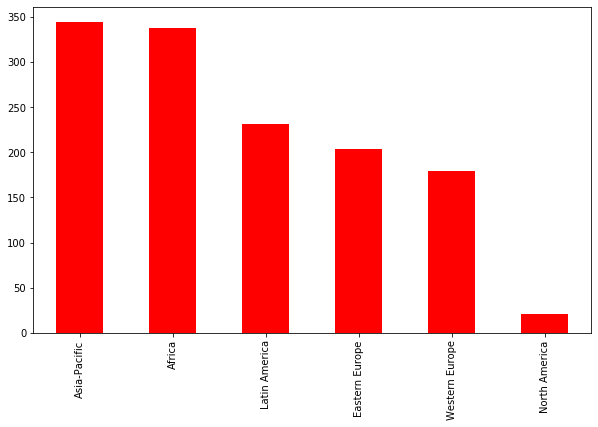

In [0]:

plt.figure(figsize=(10,6))
list = df_WHR.sort_values(by=['Happiness score'],ascending=True)['Region'].value_counts()
list.plot(kind = 'bar', color = 'red')

In [0]:
# DF ordered by the feature "life ladder" 
Ranking=df_WHR_perYear.sort_values(by="Happiness score", ascending=False).head(10)

[Text(0, 0.5, 'Happiness Score'), Text(0.5, 0, 'Country')]

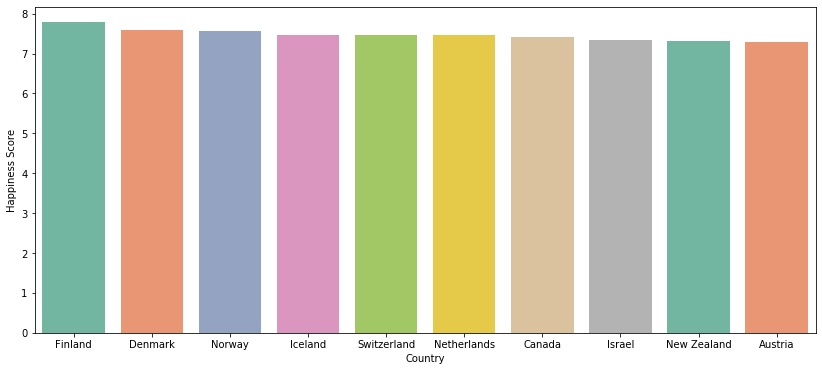

In [0]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x='Country',y='Happiness score', data=Ranking, palette = 'Set2')
ax.set(xlabel='Country', ylabel='Happiness Score')

##Europe vs Asia

# 3.Features that have an impact on the hapiness score 

### Correlation of the features with Hapiness score




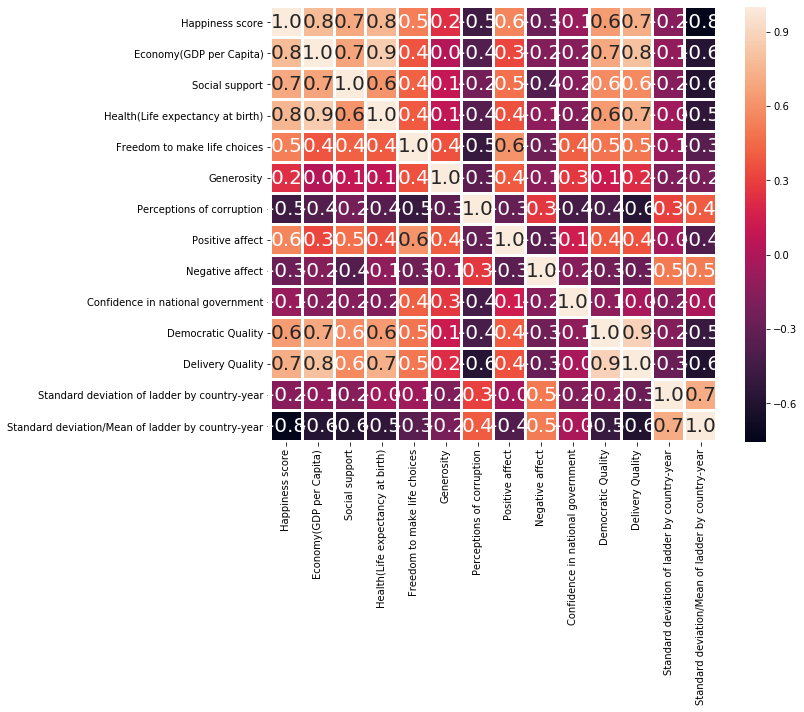

In [0]:
plt.figure(figsize=(10,8))
corr = df_WHR.drop(['Country','Region','Year'],axis = 1).corr()
sns.heatmap(corr, cbar = True, annot=True, linewidths = 2, fmt='.1f',annot_kws={'size': 20}) 


We can see that the Hapiness score is highly correlated with economy, social support and delivery quality.

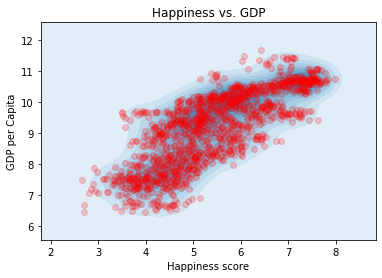

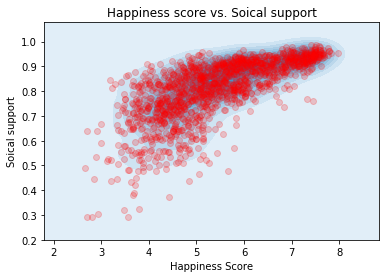

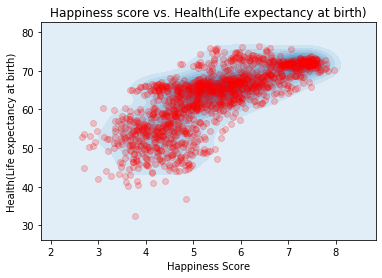

In [0]:
sns.kdeplot(df_WHR['Happiness score'], df_WHR['Economy(GDP per Capita)'], shade=True)
plt.scatter(df_WHR['Happiness score'], df_WHR['Economy(GDP per Capita)'], alpha=0.2, color='red')
plt.xlabel('Happiness score')
plt.ylabel('GDP per Capita')
plt.title('Happiness vs. GDP')
plt.show()


sns.kdeplot(df_WHR['Happiness score'], df_WHR['Social support'], shade=True)
plt.scatter(df_WHR['Happiness score'], df_WHR['Social support'], alpha=0.2, color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Soical support')
plt.title('Happiness score vs. Soical support')
plt.show()


sns.kdeplot(df_WHR['Happiness score'], df_WHR['Health(Life expectancy at birth)'], shade=True)
plt.scatter(df_WHR['Happiness score'], df_WHR['Health(Life expectancy at birth)'], alpha=0.2, color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Health(Life expectancy at birth)')
plt.title('Happiness score vs. Health(Life expectancy at birth)')
plt.show()

<Figure size 864x864 with 0 Axes>

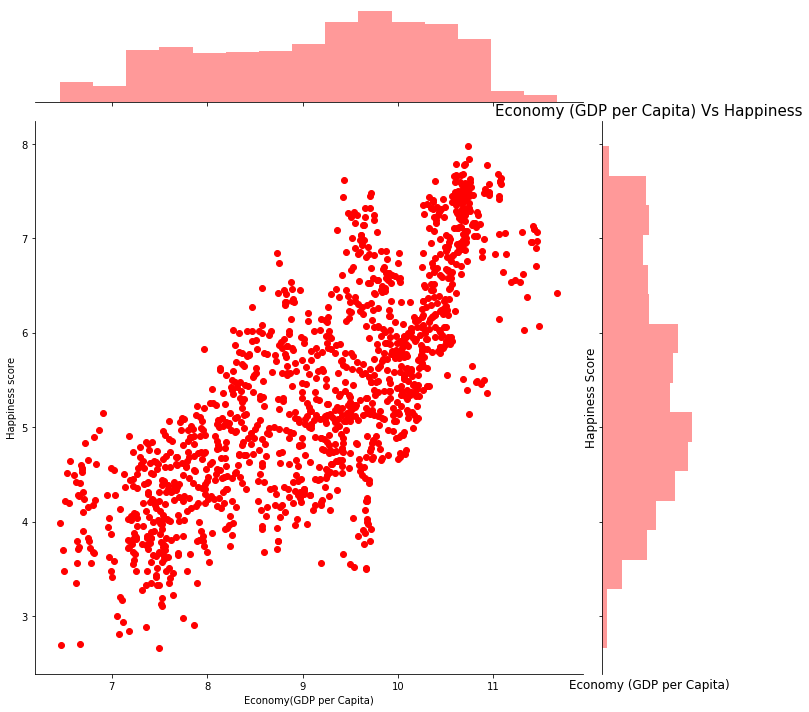

In [0]:
#Jointplot for Happiness score and GDP 

plt.figure(figsize=(12,12))
sns.jointplot(x = 'Economy(GDP per Capita)', y = 'Happiness score', data = df_WHR, height=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Economy (GDP per Capita)', fontsize=12)
plt.title('Economy (GDP per Capita) Vs Happiness', fontsize=15)
plt.show()

We can see when GDP increase, the happiness score increase.

<Figure size 864x864 with 0 Axes>

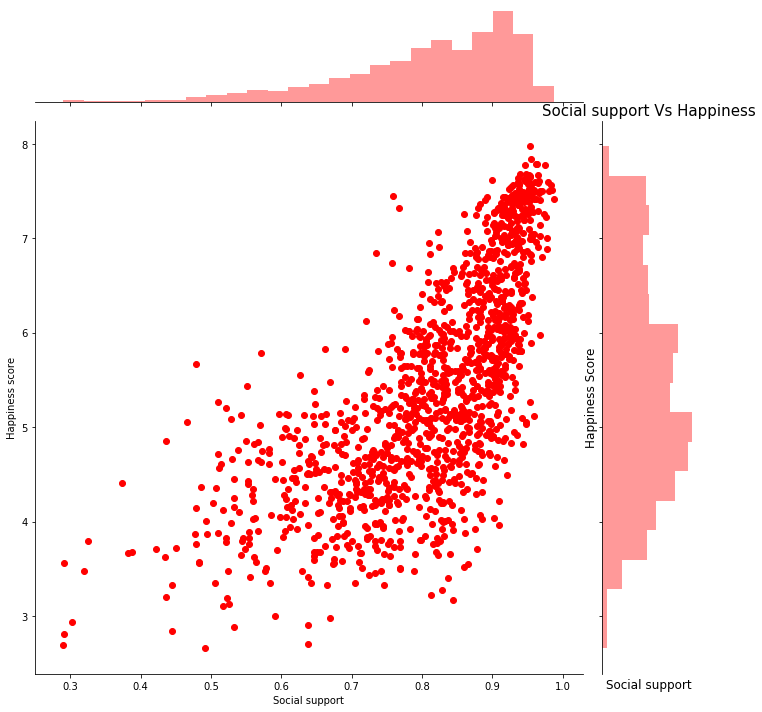

In [0]:
#Jointplot for Happiness score and Social support

plt.figure(figsize=(12,12))
sns.jointplot(x = 'Social support', y = 'Happiness score', data = df_WHR, height=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Social support', fontsize=12)
plt.title('Social support Vs Happiness', fontsize=15)
plt.show()

We can see when social score increase, the happiness score increase.

<Figure size 864x864 with 0 Axes>

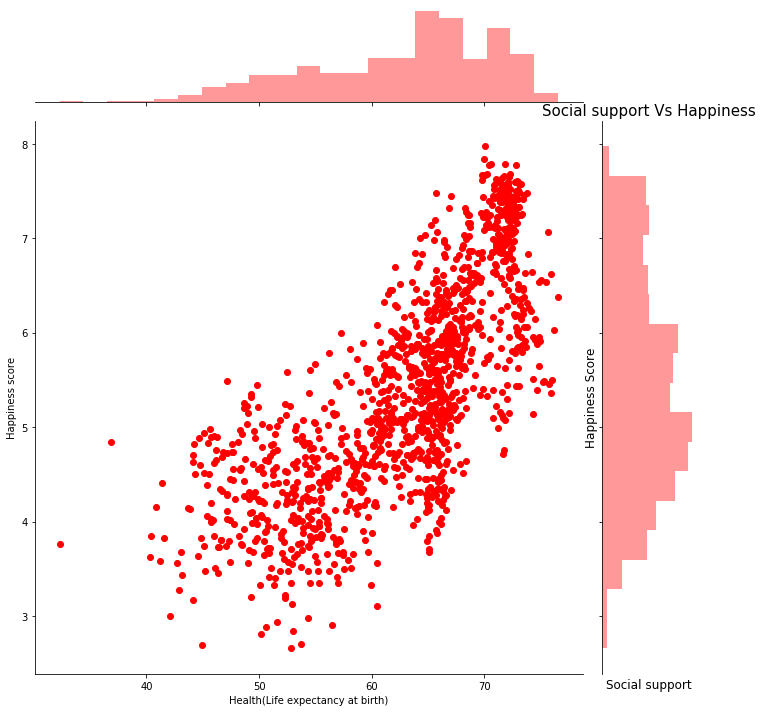

In [0]:
#Jointplot for Happiness score and Social support

plt.figure(figsize=(12,12))
sns.jointplot(x = 'Health(Life expectancy at birth)', y = 'Happiness score', data = df_WHR, height=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Social support', fontsize=12)
plt.title('Social support Vs Happiness', fontsize=15)
plt.show()

##Linear regression

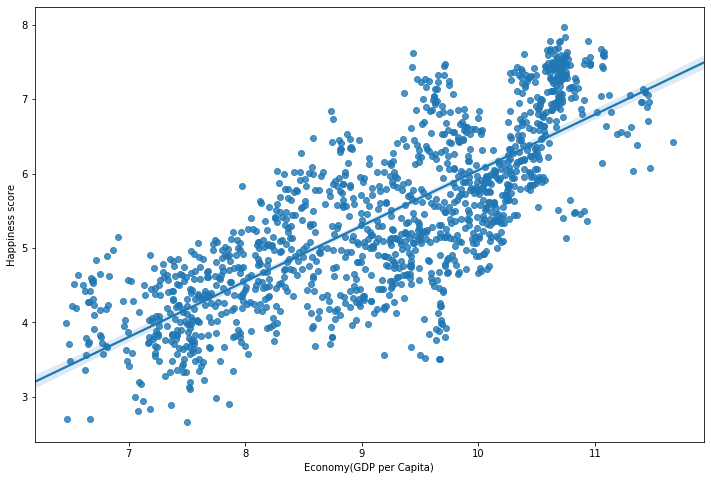

In [0]:
plt.figure(figsize=(12,8))
sns.regplot(x='Economy(GDP per Capita)',y='Happiness score' ,data=df_WHR)

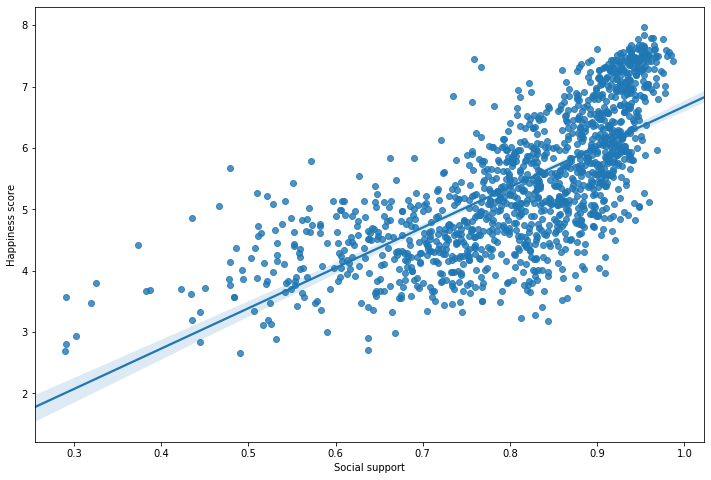

In [0]:
plt.figure(figsize=(12,8))
sns.regplot(x='Social support',y='Happiness score' ,data=df_WHR)

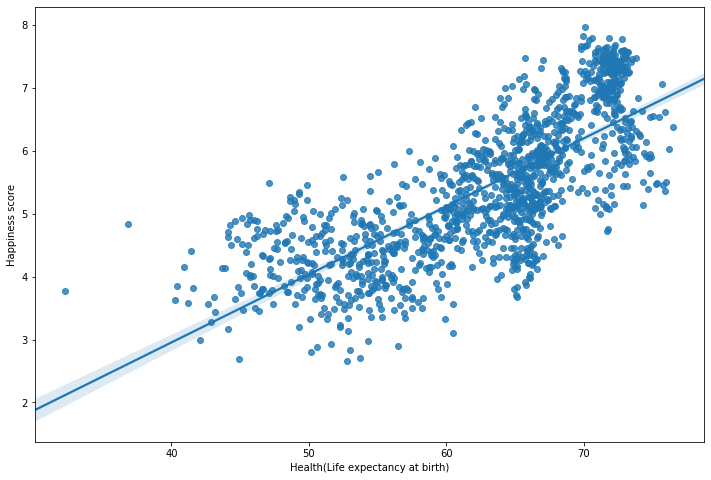

In [0]:
plt.figure(figsize=(12,8))
sns.regplot(x='Health(Life expectancy at birth)',y='Happiness score' ,data=df_WHR)

There is a **linear regression** with:


*   Happiness score and GPD
*   Happiness score and Social support
*   Happiness score and Health



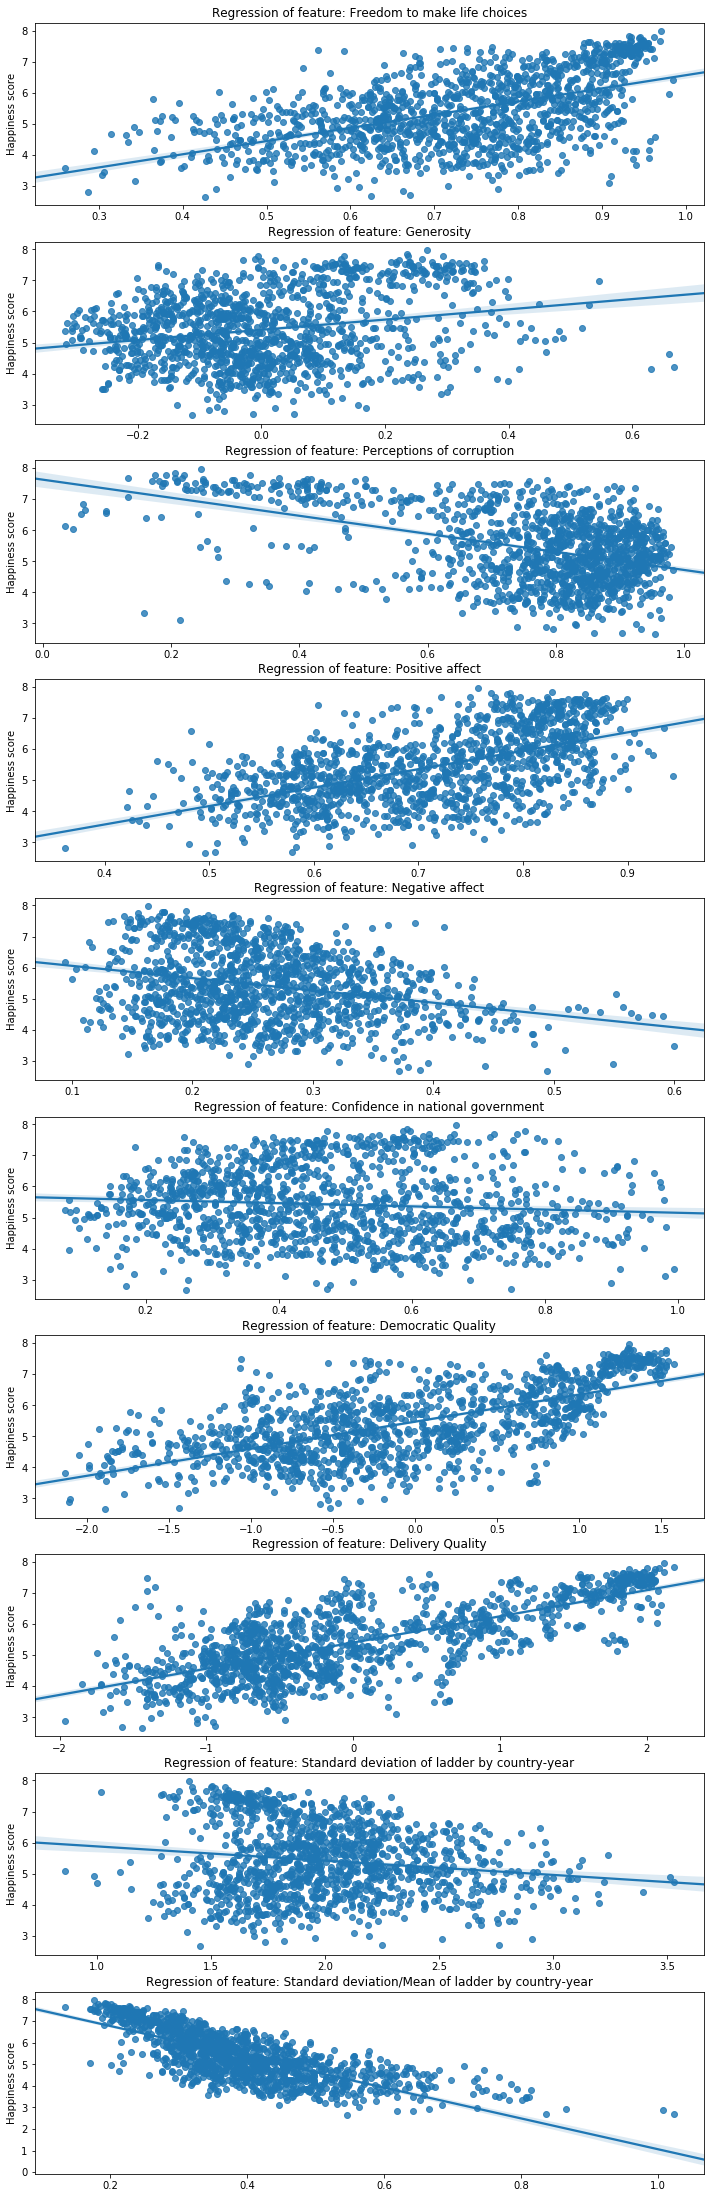

In [0]:
cols = ['Freedom to make life choices', 'Generosity','Perceptions of corruption','Positive affect',
        'Negative affect','Confidence in national government','Democratic Quality','Delivery Quality','Standard deviation of ladder by country-year',
        'Standard deviation/Mean of ladder by country-year']
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(cols):
    ax = plt.subplot(gs[i])
    #sns.distplot(df1[cn], bins=50)
    sns.regplot(x=df_WHR[cn],y='Happiness score' ,data=df_WHR)
    ax.set_xlabel('')
    ax.set_title('Regression of feature: ' + str(cn))
plt.show()